In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [151]:
df = pd.read_pickle('dataset/real_data.pickle')
print(df.shape)
df.head()

(8068, 7)


,url,title,html,text,authors,domain,word_count
0,http://www.bbc.com/news/world-latin-america-42187139,Argentina ends missing sub 'rescue mission',"<!DOCTYPE html>\n<html lang=""en"" id=""responsive-news"">\n<head prefix=""og: http://ogp.me/ns#"">\n <meta charset=""utf-8"">\n <meta http-equiv=""X-UA-Compatible"" content=""IE=edge,chrome=1"">\n ...","The Argentine navy has said it has abandoned attempts to rescue 44 crew members on board a submarine that disappeared two weeks ago.\n\n""Despite the magnitude of the efforts made, it has not been ...",,http://www.bbc.com,166
1,http://www.bbc.com/news/world-us-canada-42173927,"Air Transat slapped with $228,000 fine for tarmac delay","<!DOCTYPE html>\n<html lang=""en"" id=""responsive-news"">\n<head prefix=""og: http://ogp.me/ns#"">\n <meta charset=""utf-8"">\n <meta http-equiv=""X-UA-Compatible"" content=""IE=edge,chrome=1"">\n ...","Image caption Air Transat has been fined for a lengthy tarmac delay\n\nAir Transat has been fined C$295,000 ($228,000; £169,000) after passengers had to wait on the tarmac for up to six hours with...",,http://www.bbc.com,347
2,https://blogs.wsj.com/moneybeat/2017/11/30/3m-leads-dow-to-latest-milestone/,3M Leads Dow to Latest Milestone,"<!DOCTYPE html>\n<!-- TESLA DESKTOP16 V1 RESPONSIVE_ARTICLE FULL -->\n<html\n itemscope=""""\n itemtype=""http://schema.org/WebPage""\n xmlns=""http://www.w3.org/1999/xhtml""\n lang=""en-US""\n data-...","The Dow Jones Industrial Average just closed above its fifth round-number milestone of the year. This time, industrial giant was in the driver’s seat. The Dow hit 24000 on Thursday, just 30 days a...",Chelsey Dulaney,https://www.wsj.com,60
3,https://www.wsj.com/articles/the-good-the-bad-and-the-ugly-industry-reaction-to-the-proposed-tax-overhaul-1512078188?tesla=y,What a Tax Overhaul Means for Your Industry,"<!DOCTYPE html>\n<!-- TESLA DESKTOP16 V1 RESPONSIVE_ARTICLE SNIPPET -->\n<html\n itemscope=""""\n itemtype=""http://schema.org/WebPage""\n xmlns=""http://www.w3.org/1999/xhtml""\n lang=""en-US""\n da...","U.S. STOCKS\n\nThe tax overhaul making its way through Congress could help many stocks, providing another potential lift to an 8-year-old bull market.\n\nA reduction in the corporate tax rate is e...",A Wsj Roundup,https://www.wsj.com,87
4,https://www.wsj.com/articles/taylor-swifts-reputation-ready-for-streaming-1512078231,Taylor Swift’s ‘Reputation’ Ready for Streaming,"<!DOCTYPE html>\n<!-- TESLA DESKTOP16 V1 RESPONSIVE_ARTICLE SNIPPET -->\n<html\n itemscope=""""\n itemtype=""http://schema.org/WebPage""\n xmlns=""http://www.w3.org/1999/xhtml""\n lang=""en-US""\n da...","Streaming-music subscribers will finally get access to Taylor Swift’s newest album, three weeks after it went on sale, according to people familiar with the matter.\n\n“Reputation,” the pop-star’s...",Anne Steele-Anne.Steele Wsj.Com,https://www.wsj.com,67


In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.max_colwidth = 200

In [108]:
vals =  np.array(list(df.word_count.values))
indicies = np.argsort(vals)

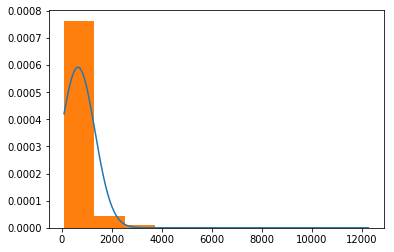

In [150]:
# Data before cleaning
sorted_vals = [vals[i] for i in indicies]
fit = stats.norm.pdf(sorted_vals, np.mean(sorted_vals), np.std(sorted_vals))
plt.plot(sorted_vals, fit)
plt.hist(sorted_vals,normed=True)
plt.show()

In [149]:
# Remove all articles less than 30 words
indicies_30 = np.where(vals<30)[0]
sorted_vals = [x for x in indicies if x in indicies_30]
print(len(sorted_vals))
# print(df.loc[sorted_vals]['url'])
# NOTE: 
# These urls seem to be mostly not found
# print(df.loc[898])

0


In [148]:
indicies_40 = np.where(np.logical_and(vals>100, vals<110))[0]
sorted_vals = [x for x in indicies if x in indicies_40]
print(len(sorted_vals))
# print(df.loc[sorted_vals]['url'])
# Note: Articles under 100 words seem to be illegitemate articles such as video descriptions or other lanugages

87


In [123]:
# Remove articles with a word count less than 100
vals =  np.array(list(df.word_count.values))
indicies = np.argsort(vals)
indicies_100 = np.where(vals>=100)[0]
sorted_vals = [x for x in indicies if x in indicies_100]
print(len(sorted_vals))
# Store cleaned data
df.loc[sorted_vals].to_pickle('clean_real_data.pickle')

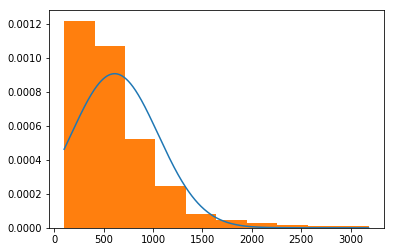

In [147]:
df_clean = pd.read_pickle('clean_real_data.pickle')
print(df_clean.shape)
df = df_clean
vals = np.array(list(df.word_count.values))
indicies = np.argsort(vals)
sorted_vals = [vals[i] for i in indicies]
# 99% of our articles
sorted_vals = sorted_vals[:int(len(sorted_vals)*.99)]

fit = stats.norm.pdf(sorted_vals, np.mean(sorted_vals), np.std(sorted_vals))
plt.plot(sorted_vals, fit)
plt.hist(sorted_vals,normed=True)
plt.show()

# Format Real News data

In [11]:
# Index: 

title = ["authors","date","text","domain"]
df = pd.read_pickle('dataset/real_data_clean.pickle')

In [167]:
# Create a random list of dates in range [Nov 30, Nov 31, Dec 1].
dates = ["30-11-2017","31-11-2017","01-12-2017"]
df['date'] = dates[0]
pos = 0
for i, row in df.iterrows():
    if pos == 3:
        pos = 0
    df.loc[i,'date'] = dates[pos]
    pos += 1

In [172]:
df = df[title]
df = df.reset_index(drop=True)
df.head()

,authors,date,text,domain
0,Chuck Altman-Rockymt-Pat Rick-Gator Jaw-Kay Martin-Roy Beane-Jjake Spitz-Racer X-Scott Henke-Frank Dipalo,30-11-2017,"November 2, 2017\n\nOAN Newsroom\n\nThe Democratic National Committee sparks public outrage over its hiring preference for — quote — “non-white males.”\n\nA leaked email regarding eight IT job ope...",http://www.oann.com
1,His Highness-No Mas-Robert Adams-Kay Crawford-Nancy Pryor-Jon Mac-Deplorable Sitting Duck-Section Ate-Eddie Couch-She S Awake,31-11-2017,"August 30, 2017\n\nOAN Newsroom\n\n11 states along with the District of Columbia run their own Obamacare exchanges, and want more federal funding.\n\nIn a letter dated August 29th to the Senate, H...",http://www.oann.com
2,Oddz Endz-C B-Mark Abby-Jorge Sedais-Phil M. Kelley-Scott Henke-All American-Billy Bones,01-12-2017,"August 25, 2017\n\nOAN Newsroom\n\nPresident Trump could be considering a former Apprentice contestant to promote a healthy lifestyle in the U.S.\n\nLou Ferrigno — who’s known for playing the Incr...",http://www.oann.com
3,,30-11-2017,"If you've donated using PayPal, it may take up to three days for us to process your donation and send you a receipt. If you donated by sending a check, it may take up to two weeks for us to receiv...",https://nutritionfacts.org
4,Donnie Newell-J. Waltam-Sandy Harris-I M A Rooster-The One After-Cassy Is Sassy-Bill Jr,31-11-2017,"August 10, 2017\n\nOAN Newsroom\n\nOregon raises the legal age required to purchase tobacco products to 21.\n\nGovernor Kate Brown signed the Senate bill Wednesday, and will take effect January fi...",http://www.oann.com


In [173]:
df.shape

(6352, 4)

In [174]:
df.to_pickle("real_data_formatted.pickle")

In [18]:
df = pd.read_pickle("dataset/real_data_formatted.pickle")
df.shape

(6352, 4)

In [19]:
df.to_csv("dataset/real_clean.csv",index=False,encoding='utf-8')

# Fake Dataset

In [30]:
df = pd.read_csv("dataset/fake_clean.csv")
print(df.shape)
df.head()

(12357, 5)


,authors,date,title,text,domain
0,Barracuda Brigade,26-10-2016,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com
1,reasoning with facts,29-10-2016,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com
2,Barracuda Brigade,31-10-2016,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com
3,Fed Up,01-11-2016,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com
4,Fed Up,01-11-2016,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com
